# SVM 이진분류
- diabetes dataset

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터준비

In [90]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [91]:
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [94]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [95]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

0이 아니어야 하는데 0인 값(이상치)
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

##### 이상치 (Outlier)

1. 이상치의 값을 결측치(null)로 만들어서 결측치와 동시에 다 한번에 날려버린다.

In [96]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

In [97]:
# 0인 값을 NaN으로 바꾼다.
df[cols] = df[cols].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [98]:
df.isna().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [99]:
# 결측치를 없앤다.
df.dropna().shape

(392, 9)

- 데이터가 너무 감소한다.
  - 데이터가 많을 때만 사용하자.

2. 평균값 구하기

In [100]:
# nan은 비교가 안 된다.
for col in cols:
  df[col] = df[col].fillna(df[col].mean())

In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### 2. 테스트데이터

In [102]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [104]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [105]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.000000,29.00000,126.000000,35.2,0.692,54
118,4,97.0,60.000000,23.00000,155.548223,28.2,0.443,22
247,0,165.0,90.000000,33.00000,680.000000,52.3,0.427,23
157,1,109.0,56.000000,21.00000,135.000000,25.2,0.833,23
468,8,120.0,72.405184,29.15342,155.548223,30.0,0.183,38


In [106]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)

StandardScaler()

In [107]:
x_train_s = ss.transform(x_train)
x_train_s[:10]

array([[ 0.90832902,  0.93627156,  0.44607305, -0.03003007, -0.35156532,
         0.36780137,  0.67740401,  1.69955804],
       [ 0.03644676, -0.81645845, -1.05366073, -0.70906988, -0.01227855,
        -0.63382702, -0.07049698, -0.96569189],
       [-1.12606292,  1.43232723,  1.44589558,  0.42266314,  6.00972644,
         2.81463643, -0.11855487, -0.88240283],
       [-0.8354355 , -0.41961392, -1.38693491, -0.93541649, -0.24822304,
        -1.06309633,  1.10091422, -0.88240283],
       [ 1.19895644, -0.05583977, -0.02007885, -0.01266707, -0.01227855,
        -0.37626543, -0.85143778,  0.36693308],
       [ 2.0708387 ,  0.4402159 , -0.02007885, -0.01266707, -0.01227855,
         2.81463643,  0.33499151,  0.5335112 ],
       [ 1.78021128,  1.30004572, -0.38711238, -0.70906988, -0.28267047,
        -1.0201694 , -0.42192034,  1.11653462],
       [ 0.6177016 ,  2.39136818,  0.44607305, -0.01266707, -0.01227855,
        -1.30634894, -1.01363317,  2.11600335],
       [-0.8354355 , -1.67628827

In [108]:
x_test_s = ss.transform(x_test)
x_test_s[:10]

array([[-0.8354355 ,  2.55672007,  0.27943597,  1.55439617, -0.01227855,
         1.46959259,  2.78594417, -0.96569189],
       [-0.54480808, -0.48575468,  0.11279888,  0.08314323, -0.6501097 ,
         0.13885774, -0.1876381 , -0.88240283],
       [ 0.03644676, -1.51093639, -0.88702365, -0.01266707, -0.01227855,
         0.19609364, -0.22668514, -0.71582471],
       [ 0.32707418,  1.46539761, -0.05383821, -1.1617631 ,  0.21107601,
        -0.97724247,  0.36202408,  1.44969086],
       [-1.12606292, -0.35347317, -0.63706802, -0.01266707, -0.01227855,
        -1.14895019,  0.58128822, -0.21609035],
       [-0.8354355 , -1.3455845 , -0.05383821, -1.2749364 , -1.33905827,
        -0.86277065, -0.55107593, -0.79911377],
       [ 1.48958386,  1.00241232,  0.44607305,  0.53583644,  0.1651461 ,
         0.2247116 ,  1.28113132, -0.04951223],
       [-0.25418066,  1.79610138,  1.1126214 , -0.25637667, -0.00709104,
         0.09593081,  2.06507574,  1.53297992],
       [-0.54480808,  0.17565288

In [109]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [110]:
# Series와 Numpy으로 서로 타입이 다르니까 타입을 변경해주자
y_train = y_train.values
y_test = y_test.values

### 3. 학습
- 베이스라인 (svm.SVC)
  - 기본 C : 1.0, kernel : 'rbf'

In [113]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train_s, y_train)

SVC(kernel='linear')

In [114]:
y_pred = clf.predict(x_test_s)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [115]:
from sklearn.metrics import confusion_matrix

def print_cfm(y_test, y_pred):
  cfm = confusion_matrix(y_test, y_pred)
  cfm # 대각선이 실제값

  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar='False')
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

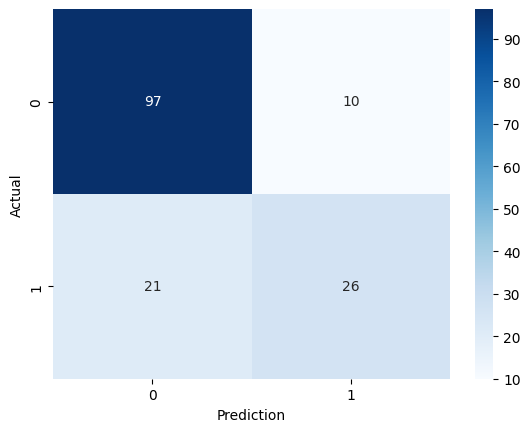

In [116]:
print_cfm(y_test, y_pred)

In [119]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_matrics(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  re = recall_score(y_test, y_pred)
  pr = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print('정확도:', np.around(acc,4))
  print('재현율:', np.around(re, 4))
  print('정밀도:', np.around(pr, 4))
  print('f1:', np.around(f1, 4))

In [120]:
print_matrics(y_test, y_pred)

정확도: 0.7987
재현율: 0.5532
정밀도: 0.7222
f1: 0.6265


### 4. 튜닝

In [121]:
# gamma 값을 rbf일 때만 적용할 수 있다.
grid_params ={
  'C':list(range(1, 10)),
  'kernel':['linear', 'poly', 'rbf'],
  'gamma':[0.1, 0.5, 1, 1.5, 2.0]
}

In [122]:
from sklearn.model_selection import GridSearchCV

clf = SVC()
grid = GridSearchCV(clf, grid_params, cv=5)

In [ ]:
%%time

grid.fit(x_train_s, y_train)

CPU times: user 34min 21s, sys: 792 ms, total: 34min 22s
Wall time: 34min 31s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.1, 0.5, 1, 1.5, 2.0],
                         'kernel': ['linear', 'poly', 'rbf']})